## t-SNE algoritam

t-distributed stochastic neighbor embedding (t-SNE) je nelinearni algoritam za smanjenje dimenzionalnosti koji se koristi za istraživanje visoko-dimenzionalnih podataka. Ovaj algoritam preslikava podatke u prostor niže dimenzije uz održavanje važnog odnosa između podataka: što su objekti bliži u originalnom prostoru, to je manja udaljenost između njih u redukovanom prostoru. Jednostavnije rečeno, t-sne daje ideju o tome kako su podaci raspoređeni u višedimezionalnom prostoru. Razvili su ga Laurens van der Maaten i Geoffrey Hinton 2008 godine.

### Matematička pozadina

t-sne algoritam za dati skup $N$ visoko-dimenzionalnih objekata $x_1,..x_N$ prvo izračunava uslovnu verovatnoću $p_{ij}$ koja je proporcionalna sličnosti objekata $x_i$ i $x_j$.
Za $i\neq j$ se definiše $p_{j|i}=\frac{\exp{\frac{-||x_i-x_j||^2}{2\sigma_i^2}}}{\sum_{k\neq i}{\exp{\frac{-||x_i-x_k||^2}{2\sigma_i^2}}}}$ i postavlja se $p_{i|i}=0$. Takođe treba napomenuti da je $\sum_{j}{p_{j|i}}=1$ za sve $i$. Dakle ova jednačina meri koliko je $x_j$ blizu $x_i$ uzimajući u obzir Gausovu raspodelu oko tačke $x_i$ uz datu varijansu $\sigma_i^2$. Varijansa je različita za svaku tačku i izabrana je tako da tačke u gustim oblastima dobiju manju varijansu od tačaka u retkim oblastima. 

Sada definišemo $p_{ij}=\frac{p_{j|i}+p_{i|j}}{2N}$ pri čemu važi $p_{ji}=p_{ij}$ i $\sum_{i,j}{p_{ij}}=1$.


Sledeći deo je formiranje nisko-dimenzionalnog prostora sa istim brojem tačaka kao i u originalnom prostoru. t-sne ima za cilj da u redukovanom prostoru između tačaka $y_1$ i $y_j$, koje odgovaraju tačkama $x_i$ i $x_j$ redom, održava sličnosti $p_{ij}$ kad god je moguće. U tu svrhu meri sličnosti $q_{ij}$ između tačaka $y_i$ i $y_j$ koristeći sličan pristup. Konkretno za $i \neq j$ se definiše $q_{ij}=\frac{(1+||y_i-y_j||^2)^{-1}}{\sum_{k}{\sum_{l\neq k}{(1+||y_k-y_l||^2)^{-1}}}}$ i postavlja $q_{ii}=0$. Ovde se koristi studentska t-raspodela za merenje sličnosti između nisko-dimenzionalnih tačaka kako bi se omogućilo da se različiti objekti modeliraju daleko jedan od drugog.

Lokacije tačaka $y_1,...,y_N$ se određuju minimizacijom nesimetrične Kullback-Leibler divergencije između dve raspodele $(p_{ij})$ i $(q_{ij})$: $KL(P||Q)=\sum_{i\neq j}{p_{ij}log\frac{p_{ij}}{q_{ij}}}$.

Minimizacija Kullback-Leibler divergencije u odnosu na tačke $y_i$ se izvodi pomoću gradijentnog spusta. Rezultat optimizacije je matrica koja odražava sličnosti između visoko-dimenzionih tačaka.

### Primer

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris

Dataset Iris je sačinjen od 50 uzoraka iz svake od tri vrste perunike (Iris setosa, Iris virginica i Iris versicolor). Za svaki uzorak izmerene su karakteristike: dužina i širina čašičnih i kruničnih listića (u centrimetrima).

In [2]:
iris = load_iris()

Skup podataka sadrži 150 redova i 5 kolona. Kolona "vrsta" govori kojoj vrsti pripada uzorak.

In [3]:
x = iris.data
y = iris.target

In [4]:
x.shape

(150, 4)

### Bibliotetčka podrška


Za primenu t-sne algoritma postoji ugrađena klasa python biblioteke sclearn koja se naziva TSNE.

class sklearn.manifold.TSNE

Neki od parametara funkcije:
* **n_components:** int, default=2  
    dimenzija redukovanog prostora
* **perplexity:** float, default=30.0  
    pomoću ovog parametra moguće je podesiti osetljivost modela na lokalne ili globalne obrasce podataka. ako je perplexity mala, model će dobro izolovati male grupe sličnih objekata. ako je velika, velike. parametar je u izvesnom smislu analogan broju najbližih suseda. 
    izabrati vrednost u rasponu od 5 do 50
* **early_exaggeration:** float, default=12.0  
    kontroliše koliko su čvrsti prirodni klasteri u originalnom prostoru, u redukovanom prostoru i koliko će prostora biti između njih
* **learning_rate:** float, default=200.0  
    stopa učenja za t-SNE u opsegu od 10.0 do 1000.0
* **n_iter:** int, default=1000  
    maksimalan broj iteracija za optimizaciju. trebalo bi da bude najmanje 250
* **n_iter_without_progress:** int, default=300  
    maksimalan broj iteracija bez napretka pre nego što prekinemo optimizaciju. treba imati na umu da se napredak proverava na svakih 50 iteracija
* **min_grad_norm:** float, default=1e-7  
    ako je norma gradijenta ispod ovog praga, optimizacija će se zaustaviti
* **metric:** str or callable, default=’euclidean’  
    metrika koja se koristi pri izračunavanju udaljenosti
    

In [5]:
tsne = TSNE(n_components=2, perplexity=30.0)

In [6]:
x_tsne = tsne.fit_transform(x)

In [7]:
x_tsne.shape

(150, 2)

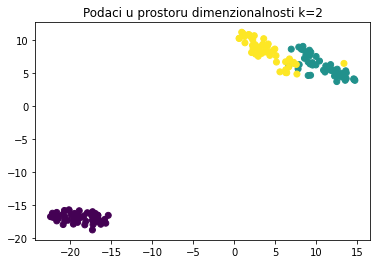

In [8]:
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y)
plt.title('Podaci u prostoru dimenzionalnosti k=2')
plt.show()

Možemo videti da je t-sne dobro formirao različite grupe od naših podataka prema različitim vrstama perunike.

### Upotreba

t-sne se može koristiti na gotovo svim skupovima podataka velikih dimenzija. Široko se primenjuje u obradi slika i govora, genomskim podacima. Koristi se i za poboljšanje analize skeniranja srca i mozga.

### Složenost

Algoritam ima kvadratnu vremensku i prostornu složenost po broju tačaka podataka.

### Literatura

https://www.analyticsvidhya.com/blog/2017/01/t-sne-implementation-r-python/  
https://www.oreilly.com/content/an-illustrated-introduction-to-the-t-sne-algorithm/